In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from math import *
import warnings
warnings.filterwarnings('ignore')

#Import models from scikit learn module:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error,r2_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
credit_train = pd.read_csv('/content/drive/My Drive/Bank Loan Status Project/credit_train.csv')
credit_test = pd.read_csv('/content/drive/My Drive/Bank Loan Status Project/credit_test.csv')

In [ ]:
df = credit_train.copy()
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [ ]:
df.shape

(100514, 19)

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
df.isnull().sum()

Loan_ID                           514
Customer_ID                       514
Loan_Status                       514
Current_Loan_Amount               514
Term                              514
Credit_Score                    19668
Annual_Income                   19668
Years_in_current_job             4736
Home_Ownership                    514
Purpose                           514
Monthly_Debt                      514
Years_of_Credit_History           514
Months_since_last_delinquent    53655
Number_of_Open_Accounts           514
Number_of_Credit_Problems         514
Current_Credit_Balance            514
Maximum_Open_Credit               516
Bankruptcies                      718
Tax_Liens                         524
dtype: int64

In [ ]:
def null_value_percentage(df):
    df_null_value_percentage = pd.DataFrame({'Columns': df.columns, 
                                             'Null_value_count': df.isna().sum(), 
                                             'Null_value_percentage': df.isnull().sum()/len(df)*100}).reset_index(drop = True)
    return df_null_value_percentage

In [ ]:
null_value_percentage(df)

,Columns,Null_value_count,Null_value_percentage
0,Loan_ID,514,0.511372
1,Customer_ID,514,0.511372
2,Loan_Status,514,0.511372
3,Current_Loan_Amount,514,0.511372
4,Term,514,0.511372
5,Credit_Score,19668,19.567423
6,Annual_Income,19668,19.567423
7,Years_in_current_job,4736,4.711781
8,Home_Ownership,514,0.511372
9,Purpose,514,0.511372


In [ ]:
df.tail()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(how='all', axis=0, inplace = True)
df.shape

(100000, 19)

In [ ]:
df.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
for i in range(len(df)):
    if df.loc[i, 'Credit_Score'] > 800:
        df.loc[i, 'Credit_Score'] /= 10
df.describe()

#Alternative 
#df['Credit_Score'] = np.where(df['Credit_Score'] > 800, df['Credit_Score']/10, df['Credit_Score'])

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,716.293447,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,28.297164,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,703.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,722.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,738.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
null_value_percentage(df)

,Columns,Null_value_count,Null_value_percentage
0,Loan_ID,0,0.000
1,Customer_ID,0,0.000
2,Loan_Status,0,0.000
3,Current_Loan_Amount,0,0.000
4,Term,0,0.000
5,Credit_Score,19154,19.154
6,Annual_Income,19154,19.154
7,Years_in_current_job,4222,4.222
8,Home_Ownership,0,0.000
9,Purpose,0,0.000


In [ ]:
df.dropna(subset=['Bankruptcies', 'Tax_Liens', 'Maximum_Open_Credit'], inplace = True)

In [ ]:
null_value_percentage(df)

,Columns,Null_value_count,Null_value_percentage
0,Loan_ID,0,0.000000
1,Customer_ID,0,0.000000
2,Loan_Status,0,0.000000
3,Current_Loan_Amount,0,0.000000
4,Term,0,0.000000
5,Credit_Score,19111,19.150450
6,Annual_Income,19111,19.150450
7,Years_in_current_job,4222,4.230715
8,Home_Ownership,0,0.000000
9,Purpose,0,0.000000


In [ ]:
df.drop(['Loan_ID', 'Customer_ID', 'Months_since_last_delinquent'], axis = 1, inplace = True)

In [ ]:
#df.interpolate(limit_direction = 'both', inplace = True)
df['Credit_Score'].fillna((df['Credit_Score'].median()), inplace=True)
df['Annual_Income'].fillna((df['Annual_Income'].median()), inplace=True)

In [ ]:
null_value_percentage(df)

,Columns,Null_value_count,Null_value_percentage
0,Loan_Status,0,0.000000
1,Current_Loan_Amount,0,0.000000
2,Term,0,0.000000
3,Credit_Score,0,0.000000
4,Annual_Income,0,0.000000
5,Years_in_current_job,4222,4.230715
6,Home_Ownership,0,0.000000
7,Purpose,0,0.000000
8,Monthly_Debt,0,0.000000
9,Years_of_Credit_History,0,0.000000


In [ ]:
df.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,9.979400e+04,99794.000000,9.979400e+04,99794.000000,99794.000000,99794.000000,99794.000000,9.979400e+04,9.979400e+04,99794.000000,99794.000000
mean,1.175728e+07,717.374331,1.339278e+06,18486.117117,18.193694,11.130910,0.168577,2.946602e+05,7.575265e+05,0.117743,0.029371
std,3.177985e+07,25.548502,9.752220e+05,12172.465813,7.015261,5.007745,0.483087,3.760668e+05,8.349533e+06,0.351427,0.258433
min,1.542200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796960e+05,709.000000,9.312470e+05,10228.317500,13.500000,8.000000,0.000000,1.127698e+05,2.735260e+05,0.000000,0.000000
50%,3.124770e+05,722.000000,1.174371e+06,16237.210000,16.900000,10.000000,0.000000,2.099120e+05,4.678740e+05,0.000000,0.000000
75%,5.250960e+05,735.000000,1.512884e+06,24025.215000,21.700000,14.000000,0.000000,3.680680e+05,7.828260e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


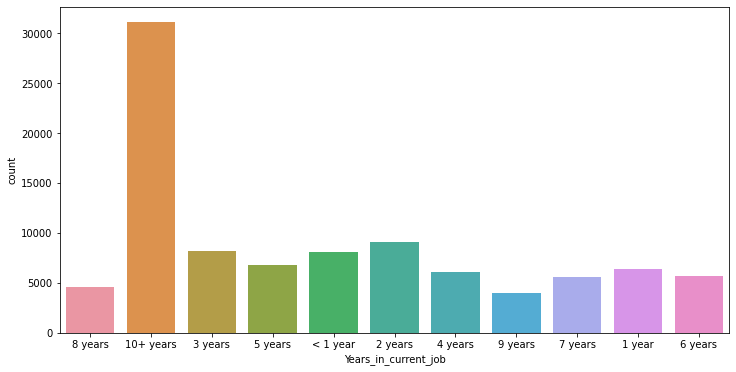

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df['Years_in_current_job'])

In [ ]:
# fill with '10+ years'
df['Years_in_current_job'].fillna('10+ years', inplace=True)

In [ ]:
null_value_percentage(df)

,Columns,Null_value_count,Null_value_percentage
0,Loan_Status,0,0.0
1,Current_Loan_Amount,0,0.0
2,Term,0,0.0
3,Credit_Score,0,0.0
4,Annual_Income,0,0.0
5,Years_in_current_job,0,0.0
6,Home_Ownership,0,0.0
7,Purpose,0,0.0
8,Monthly_Debt,0,0.0
9,Years_of_Credit_History,0,0.0


In [ ]:
df.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,9.979400e+04,99794.000000,9.979400e+04,99794.000000,99794.000000,99794.000000,99794.000000,9.979400e+04,9.979400e+04,99794.000000,99794.000000
mean,1.175728e+07,717.374331,1.339278e+06,18486.117117,18.193694,11.130910,0.168577,2.946602e+05,7.575265e+05,0.117743,0.029371
std,3.177985e+07,25.548502,9.752220e+05,12172.465813,7.015261,5.007745,0.483087,3.760668e+05,8.349533e+06,0.351427,0.258433
min,1.542200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796960e+05,709.000000,9.312470e+05,10228.317500,13.500000,8.000000,0.000000,1.127698e+05,2.735260e+05,0.000000,0.000000
50%,3.124770e+05,722.000000,1.174371e+06,16237.210000,16.900000,10.000000,0.000000,2.099120e+05,4.678740e+05,0.000000,0.000000
75%,5.250960e+05,735.000000,1.512884e+06,24025.215000,21.700000,14.000000,0.000000,3.680680e+05,7.828260e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
df.corr()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
Current_Loan_Amount,1.000000,0.117122,0.027463,-0.006571,0.019303,0.001656,-0.002834,0.003992,-0.001126,-0.000611,-0.002039
Credit_Score,0.117122,1.000000,-0.012337,-0.082363,0.069737,-0.027396,-0.043377,-0.014662,0.013272,-0.031622,-0.019392
Annual_Income,0.027463,-0.012337,1.000000,0.437575,0.144051,0.131656,-0.014818,0.283513,0.038390,-0.042449,0.037442
Monthly_Debt,-0.006571,-0.082363,0.437575,1.000000,0.199743,0.411185,-0.055744,0.481000,0.039532,-0.078977,0.020025
Years_of_Credit_History,0.019303,0.069737,0.144051,0.199743,1.000000,0.132226,0.061887,0.208432,0.030742,0.066248,0.017345
Number_of_Open_Accounts,0.001656,-0.027396,0.131656,0.411185,0.132226,1.000000,-0.014184,0.227776,0.030985,-0.024582,0.006499
Number_of_Credit_Problems,-0.002834,-0.043377,-0.014818,-0.055744,0.061887,-0.014184,1.000000,-0.112704,-0.012011,0.752941,0.581352
Current_Credit_Balance,0.003992,-0.014662,0.283513,0.481000,0.208432,0.227776,-0.112704,1.000000,0.138464,-0.122609,-0.015677
Maximum_Open_Credit,-0.001126,0.013272,0.038390,0.039532,0.030742,0.030985,-0.012011,0.138464,1.000000,-0.014574,-0.001022
Bankruptcies,-0.000611,-0.031622,-0.042449,-0.078977,0.066248,-0.024582,0.752941,-0.122609,-0.014574,1.000000,0.046109


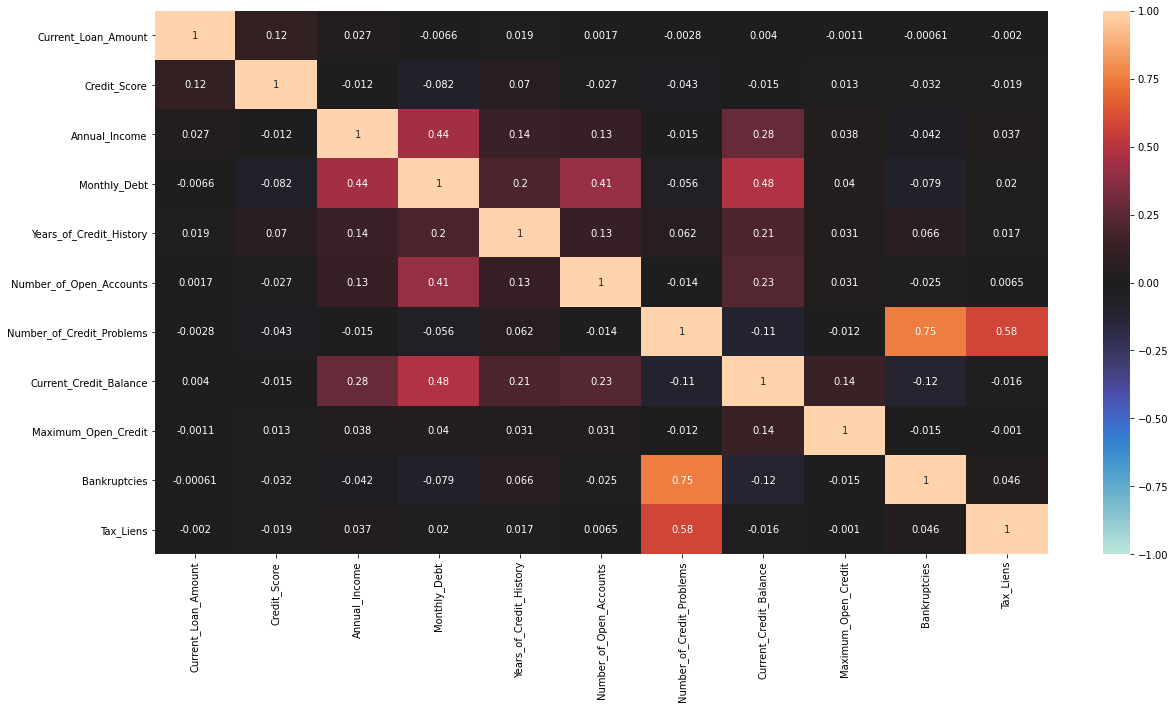

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, ax = ax)

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                          k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(to_drop)

# Drop Marked Features
df = df.drop(to_drop, axis=1)

['Bankruptcies']


In [ ]:
df

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Tax_Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,0.0
1,Fully Paid,262328.0,Short Term,722.0,1174371.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0
4,Fully Paid,176220.0,Short Term,722.0,1174371.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0


In [ ]:
df['Years_in_current_job'].value_counts()

10+ years    35312
2 years       9104
3 years       8151
< 1 year      8114
5 years       6778
1 year        6436
4 years       6132
6 years       5676
7 years       5573
8 years       4569
9 years       3949
Name: Years_in_current_job, dtype: int64

In [ ]:
df['Years_in_current_job'] = df['Years_in_current_job'].map({'10+ years': 10,
                                                             '2 years': 2,
                                                             '3 years': 3,
                                                             '< 1 year': 0,
                                                             '5 years': 5, 
                                                             '1 year': 1,
                                                             '4 years': 4, 
                                                             '6 years': 6, 
                                                             '7 years': 7, 
                                                             '8 years': 8, 
                                                             '9 years': 9})

In [ ]:
#sns.pairplot(df)

In [ ]:
df['Term'].value_counts()

Short Term    72002
Long Term     27792
Name: Term, dtype: int64

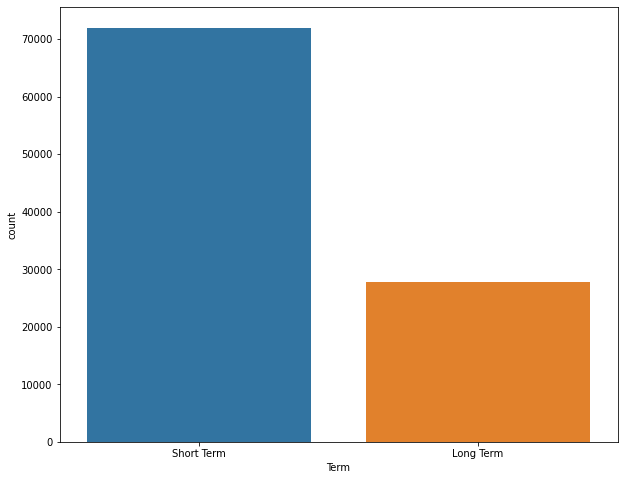

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Term', data = df)

In [ ]:
df['Term'] = df['Term'].map({'Short Term': 0,
                                           'Long Term': 0 })

In [ ]:
df['Purpose'].value_counts()

Debt Consolidation      78430
other                    6010
Home Improvements        5828
Other                    3242
Business Loan            1555
Buy a Car                1260
Medical Bills            1124
Buy House                 678
Take a Trip               572
major_purchase            352
small_business            277
moving                    150
wedding                   112
vacation                  101
Educational Expenses       93
renewable_energy           10
Name: Purpose, dtype: int64

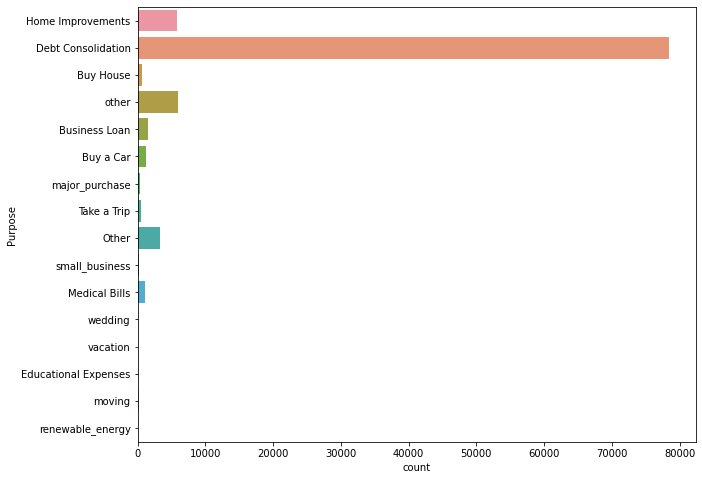

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y ='Purpose', data = df)

In [ ]:
df['Home_Ownership'].value_counts()

Home Mortgage    48334
Rent             42085
Own Home          9162
HaveMortgage       213
Name: Home_Ownership, dtype: int64

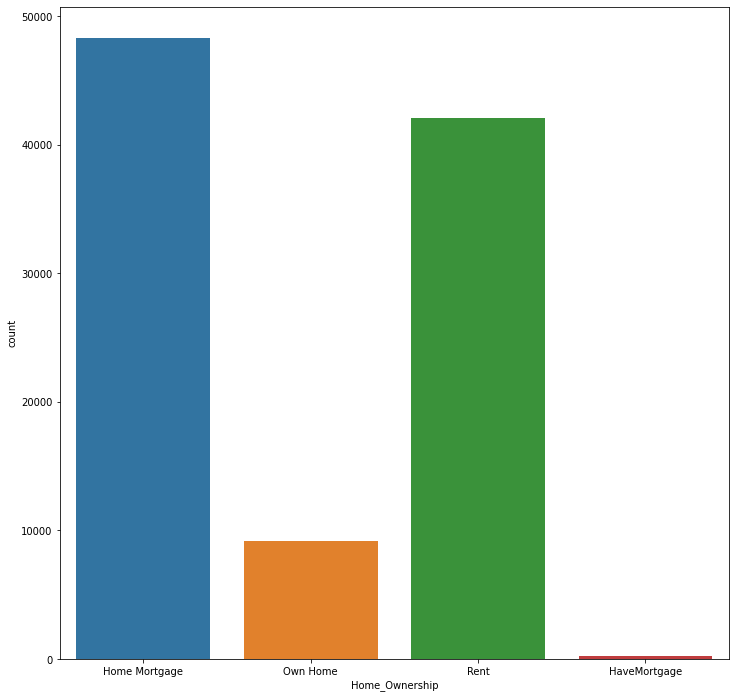

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x ='Home_Ownership', data = df)

In [ ]:
# unique_loan_status = df.Loan_Status.unique()
# loan_status = {}
# for index in range(len(unique_loan_status)):
#     loan_status[unique_loan_status[index]] = index
# loan_status

In [ ]:
# encode = {'Loan_Status': loan_status }
# df.replace(encode, inplace = True)

In [ ]:
# def decode(value, column_name = ''):
#     dicVal = encode[column_name]
#     #y=(dicVal['value']) #key value
#     return(list(dicVal.keys())[list(dicVal.values()).index(value)])

In [ ]:
# decode(1, column_name = 'Loan_Status')

In [ ]:
df['Loan_Status'].value_counts()

Fully Paid     77207
Charged Off    22587
Name: Loan_Status, dtype: int64

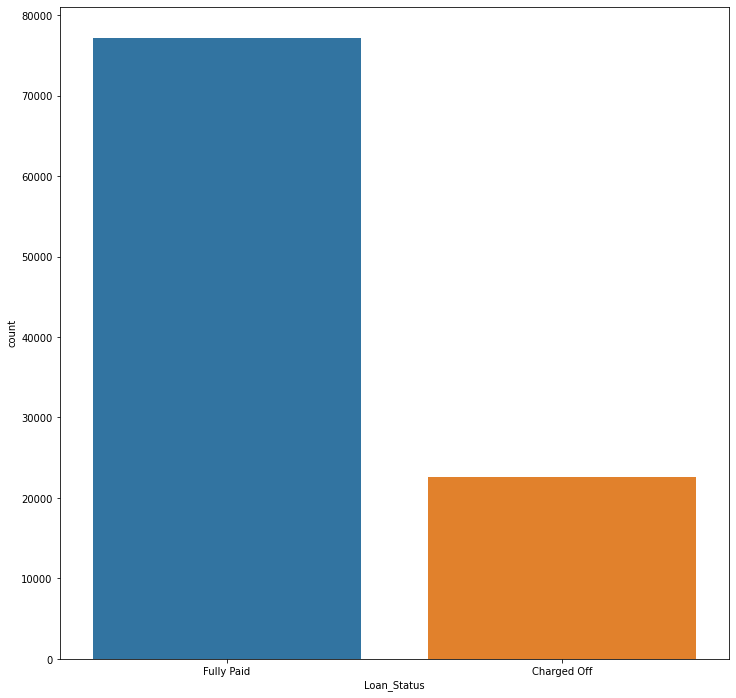

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x ='Loan_Status', data = df)

In [ ]:
df['Loan_Status'] = df['Loan_Status'].map({'Fully Paid': 1,
                                           'Charged Off': 0 })

In [ ]:
df.dtypes

Loan_Status                    int64
Current_Loan_Amount          float64
Term                           int64
Credit_Score                 float64
Annual_Income                float64
Years_in_current_job           int64
Home_Ownership                object
Purpose                       object
Monthly_Debt                 float64
Years_of_Credit_History      float64
Number_of_Open_Accounts      float64
Number_of_Credit_Problems    float64
Current_Credit_Balance       float64
Maximum_Open_Credit          float64
Tax_Liens                    float64
dtype: object

In [ ]:
cat_data = ['Home_Ownership', 'Purpose']
df1 = pd.get_dummies(df, prefix = cat_data, columns = cat_data)
df1.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Tax_Liens,Home_Ownership_HaveMortgage,Home_Ownership_Home Mortgage,Home_Ownership_Own Home,Home_Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1,445412.0,0,709.0,1167493.0,8,5214.74,17.2,6.0,1.0,228190.0,416746.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,262328.0,0,722.0,1174371.0,10,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,99999999.0,0,741.0,2231892.0,8,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,347666.0,0,721.0,806949.0,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,176220.0,0,722.0,1174371.0,5,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.drop(columns=['Home_Ownership_HaveMortgage', 'Purpose_renewable_energy'], axis=1, inplace=True)

In [ ]:
X = df1.drop(['Loan_Status'], axis=1)
y = df1["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# copy of datasets
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()


# non_cat_data = ['Current_Loan_Amount',	'Credit_Score',	'Annual_Income',	
#                 'Monthly_Debt',	'Years_of_Credit_History',	
#                 'Number_of_Open_Accounts',	'Number_of_Credit_Problems',	
#                 'Current_Credit_Balance',	'Maximum_Open_Credit',	
#                 'Bankruptcies',	'Tax_Liens']
non_cat_data = ['Current_Loan_Amount',	'Credit_Score',	'Annual_Income',	
                'Monthly_Debt',	'Years_of_Credit_History',	
                'Number_of_Open_Accounts',	'Number_of_Credit_Problems',	
                'Current_Credit_Balance',	'Maximum_Open_Credit',	
                	'Tax_Liens']
# apply normalization
norm = MinMaxScaler()

for i in non_cat_data:
  X_train_norm[i] = norm.fit_transform(X_train_norm[[i]])
  X_test_norm[i] = norm.transform(X_test_norm[[i]])

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# non_cat_data = ['Current_Loan_Amount',	'Credit_Score',	'Annual_Income',	
#                 'Monthly_Debt',	'Years_of_Credit_History',	
#                 'Number_of_Open_Accounts',	'Number_of_Credit_Problems',	
#                 'Current_Credit_Balance',	'Maximum_Open_Credit',	
#                 'Bankruptcies',	'Tax_Liens']

# apply standardization on numerical features
scaler = StandardScaler()

for i in non_cat_data:
  X_train_scaled[i] = scaler.fit_transform(X_train_scaled[[i]])
  X_test_scaled[i] = scaler.transform(X_test_scaled[[i]])

In [ ]:
X_train

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Tax_Liens,Home_Ownership_Home Mortgage,Home_Ownership_Own Home,Home_Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_small_business,Purpose_vacation,Purpose_wedding
55898,99999999.0,0,700.0,1142964.0,10,13144.01,20.1,12.0,0.0,225036.0,306548.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
25232,349756.0,0,742.0,1850087.0,7,18346.59,12.5,7.0,0.0,317870.0,452188.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
86454,107844.0,0,718.0,1319398.0,3,29466.53,8.8,16.0,0.0,509428.0,716716.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14242,109120.0,0,716.0,621319.0,2,8646.52,13.0,10.0,0.0,92815.0,268686.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
63779,257268.0,0,743.0,1020813.0,10,8676.92,20.3,16.0,1.0,293303.0,814418.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59572,265408.0,0,740.0,1910070.0,3,9773.22,7.4,8.0,0.0,178562.0,367224.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5526,89056.0,0,727.0,769196.0,5,6038.20,25.0,6.0,1.0,79724.0,115412.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
20507,402292.0,0,684.0,772084.0,1,2200.39,11.4,12.0,0.0,148371.0,541970.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
18678,268444.0,0,716.0,850041.0,10,18984.42,26.6,12.0,0.0,150936.0,270138.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_norm

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Tax_Liens,Home_Ownership_Home Mortgage,Home_Ownership_Own Home,Home_Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_small_business,Purpose_vacation,Purpose_wedding
55898,1.000000,0,0.692771,0.038058,10,0.057383,0.245509,0.157895,0.000000,0.017328,0.000199,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
25232,0.003344,0,0.945783,0.063296,7,0.080096,0.131737,0.092105,0.000000,0.024476,0.000294,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
86454,0.000924,0,0.801205,0.044355,3,0.128642,0.076347,0.210526,0.000000,0.039226,0.000465,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14242,0.000937,0,0.789157,0.019440,2,0.037748,0.139222,0.131579,0.000000,0.007147,0.000175,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
63779,0.002419,0,0.951807,0.033698,10,0.037881,0.248503,0.210526,0.066667,0.022584,0.000529,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59572,0.002500,0,0.933735,0.065436,3,0.042667,0.055389,0.105263,0.000000,0.013749,0.000238,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5526,0.000736,0,0.855422,0.024718,5,0.026361,0.318862,0.078947,0.066667,0.006139,0.000075,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
20507,0.003869,0,0.596386,0.024821,1,0.009606,0.115269,0.157895,0.000000,0.011425,0.000352,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
18678,0.002531,0,0.789157,0.027604,10,0.082880,0.342814,0.157895,0.000000,0.011622,0.000175,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_scaled

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Tax_Liens,Home_Ownership_Home Mortgage,Home_Ownership_Own Home,Home_Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_small_business,Purpose_vacation,Purpose_wedding
55898,2.788897,0,-0.677766,-0.240705,10,-0.444000,0.273573,0.171453,-0.350103,-0.192239,-0.046548,-0.111658,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
25232,-0.357366,0,0.965137,0.631633,7,-0.013607,-0.811849,-0.826655,-0.350103,0.069504,-0.032005,-0.111658,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
86454,-0.365004,0,0.026335,-0.023048,3,0.906310,-1.340278,0.969940,-0.350103,0.609595,-0.005590,-0.111658,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14242,-0.364964,0,-0.051898,-0.884230,2,-0.816063,-0.740440,-0.227790,-0.350103,-0.565032,-0.050329,-0.111658,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
63779,-0.360286,0,1.004253,-0.391396,10,-0.813548,0.302137,0.969940,1.723569,0.000238,0.004166,-0.111658,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59572,-0.360029,0,0.886903,0.705631,3,-0.722855,-1.540224,-0.627033,-0.350103,-0.323271,-0.040489,-0.111658,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5526,-0.365597,0,0.378386,-0.701802,5,-1.031841,0.973385,-1.026277,1.723569,-0.601942,-0.065634,-0.111658,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
20507,-0.355707,0,-1.303634,-0.698240,1,-1.349331,-0.968950,0.171453,-0.350103,-0.408394,-0.023040,-0.111658,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
18678,-0.359933,0,-0.051898,-0.602068,10,0.039158,1.201895,0.171453,-0.350103,-0.401162,-0.050184,-0.111658,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data = [X_train, X_train_norm, X_train_scaled]
test_data = [X_test, X_test_norm, X_test_scaled]
data = ['Original','Normalized','Standardized']

In [ ]:
def prediction(model):
  accuracy = []
  f1score = []
  precision = []
  recall = []
  for i in range(len(train_data)):
    model.fit(train_data[i], y_train)
    y_pred = model.predict(test_data[i])


    print('\n clasification report with {} data:\n {}'.format(data[i], classification_report(y_test, y_pred)))
    print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))
    # accuracies = cross_val_score(estimator = model, X = train_data[i], y = y_train, cv = 10)
    # print('Accuracy on test set:',(accuracies.mean())*100)
    accuracy.append(accuracy_score(y_test, y_pred))
    f1score.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))

  model_score = pd.DataFrame(list(zip(data, accuracy, recall, precision, f1score)), columns = ['Data', 'Accuracy', 'Recall', 'Precision', 'F1_Score'])
  return model_score



In [ ]:
clf = LogisticRegression(random_state = 0, class_weight='balanced')
clf_score = prediction(clf)


 clasification report with Original data:
               precision    recall  f1-score   support

           0       0.27      0.70      0.39      8985
           1       0.84      0.45      0.59     30933

    accuracy                           0.51     39918
   macro avg       0.56      0.58      0.49     39918
weighted avg       0.71      0.51      0.54     39918


 confussion matrix:
 [[ 6318  2667]
 [16985 13948]]

 clasification report with Normalized data:
               precision    recall  f1-score   support

           0       0.28      0.79      0.41      8985
           1       0.87      0.41      0.56     30933

    accuracy                           0.49     39918
   macro avg       0.57      0.60      0.48     39918
weighted avg       0.74      0.49      0.52     39918


 confussion matrix:
 [[ 7065  1920]
 [18250 12683]]

 clasification report with Standardized data:
               precision    recall  f1-score   support

           0       0.28      0.79      0.41    

In [ ]:
clf_score

,Data,Accuracy,Recall,Precision,F1_Score
0,Original,0.507691,0.450910,0.839482,0.586691
1,Normalized,0.494714,0.410015,0.868520,0.557054
2,Standardized,0.497470,0.413927,0.868951,0.560743


In [ ]:
knn= KNeighborsClassifier(n_neighbors=9)
knn_score = prediction(knn)


 clasification report with Original data:
               precision    recall  f1-score   support

           0       0.33      0.09      0.14      4535
           1       0.78      0.94      0.85     15424

    accuracy                           0.75     19959
   macro avg       0.55      0.52      0.50     19959
weighted avg       0.68      0.75      0.69     19959


 confussion matrix:
 [[  415  4120]
 [  855 14569]]

 clasification report with Normalized data:
               precision    recall  f1-score   support

           0       0.31      0.09      0.14      4535
           1       0.78      0.94      0.85     15424

    accuracy                           0.75     19959
   macro avg       0.55      0.52      0.49     19959
weighted avg       0.67      0.75      0.69     19959


 confussion matrix:
 [[  396  4139]
 [  865 14559]]

 clasification report with Standardized data:
               precision    recall  f1-score   support

           0       0.35      0.10      0.15    

In [ ]:
knn_score

,Data,Accuracy,Recall,Precision,F1_Score
0,Original,0.750739,0.944567,0.779549,0.854161
1,Normalized,0.749286,0.943919,0.778639,0.853350
2,Standardized,0.754046,0.946771,0.781285,0.856104


In [ ]:
gaussian = GaussianNB()
prediction(gaussian)


 clasification report with Original data:
               precision    recall  f1-score   support

           0       0.26      1.00      0.41      4535
           1       1.00      0.15      0.27     15424

    accuracy                           0.35     19959
   macro avg       0.63      0.58      0.34     19959
weighted avg       0.83      0.35      0.30     19959


 confussion matrix:
 [[ 4524    11]
 [13051  2373]]

 clasification report with Normalized data:
               precision    recall  f1-score   support

           0       0.26      0.96      0.41      4535
           1       0.94      0.20      0.32     15424

    accuracy                           0.37     19959
   macro avg       0.60      0.58      0.37     19959
weighted avg       0.78      0.37      0.34     19959


 confussion matrix:
 [[ 4335   200]
 [12411  3013]]

 clasification report with Standardized data:
               precision    recall  f1-score   support

           0       0.26      0.96      0.41    

,Data,Accuracy,Recall,Precision,F1_Score
0,Original,0.345558,0.153851,0.995386,0.266509
1,Normalized,0.368155,0.195345,0.937753,0.323335
2,Standardized,0.368155,0.195345,0.937753,0.323335


In [ ]:
rf = RandomForestClassifier(class_weight='balanced_subsample')
prediction(rf)


 clasification report with Original data:
               precision    recall  f1-score   support

           0       0.51      0.03      0.05      8985
           1       0.78      0.99      0.87     30933

    accuracy                           0.78     39918
   macro avg       0.64      0.51      0.46     39918
weighted avg       0.72      0.78      0.69     39918


 confussion matrix:
 [[  247  8738]
 [  241 30692]]

 clasification report with Normalized data:
               precision    recall  f1-score   support

           0       0.50      0.03      0.05      8985
           1       0.78      0.99      0.87     30933

    accuracy                           0.77     39918
   macro avg       0.64      0.51      0.46     39918
weighted avg       0.71      0.77      0.69     39918


 confussion matrix:
 [[  243  8742]
 [  247 30686]]

 clasification report with Standardized data:
               precision    recall  f1-score   support

           0       0.52      0.03      0.05    

,Data,Accuracy,Recall,Precision,F1_Score
0,Original,0.775064,0.992209,0.778392,0.872390
1,Normalized,0.774813,0.992015,0.778279,0.872245
2,Standardized,0.775314,0.992306,0.778547,0.872525
